<a href="https://colab.research.google.com/github/thuvarahan97/DataStorm1.0_TeamFixzels/blob/master/Day2/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd             #to use read_csv(), crosstab()
import numpy as np              #to use exponentiation : exp()
import statsmodels.api as sm    #to use the Logit()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
#import the dataset
traindatainput = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataStorm1.0 - Team Fixzels/credit_card_default_train.csv',sep=",")
testdatainput = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataStorm1.0 - Team Fixzels/credit_card_default_test.csv',sep=",")

In [0]:
traindata, testdata1 = train_test_split(traindatainput, train_size=0.8, test_size=0.2)
# traindata = traindatainput
testdata = testdatainput

In [771]:
traindata.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
6572,A8181,400K,F,Other,Single,Less than 30,0,0,0,0,0,0,254987,245759,226329,228360,233920,239140,8614,8175,8173,9240,9464,8388,1
6292,A7811,1M,F,Other,Single,46-65,2,2,2,2,2,2,488865,484666,507805,496176,526874,537491,6930,34650,0,39270,19635,0,1
13030,A16287,400K,M,Other,Single,31-45,2,2,2,2,0,0,325042,341494,342032,328397,312023,312564,28681,14160,62,10649,11550,11550,0
14122,A17669,500K,M,Graduate,Single,31-45,1,-2,-1,-1,-2,-1,-65,-65,7692,0,0,693,0,7757,0,0,693,0,0
14780,A18506,1M,M,Other,Other,Less than 30,0,0,0,0,0,0,140199,147073,158494,169649,286361,295581,9240,13860,13860,120120,13860,12705,0


In [772]:
traindata.describe()

,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
count,19200.000000,19200.000000,19200.000000,19200.000000,19200.000000,19200.000000,1.920000e+04,1.920000e+04,1.920000e+04,1.920000e+04,1.920000e+04,1.920000e+04,1.920000e+04,1.920000e+04,1.920000e+04,1.920000e+04,19200.000000,1.920000e+04,19200.000000
mean,-0.014167,-0.131146,-0.158281,-0.217188,-0.262604,-0.290990,1.186087e+05,1.138506e+05,1.087446e+05,1.000329e+05,9.353857e+04,9.012315e+04,1.337597e+04,1.368288e+04,1.214985e+04,1.115532e+04,11110.011198,1.241020e+04,0.222552
std,1.128084,1.204143,1.203022,1.169083,1.134801,1.149197,1.708026e+05,1.652660e+05,1.614520e+05,1.483527e+05,1.409190e+05,1.388234e+05,3.989635e+04,5.479218e+04,4.104016e+04,3.542472e+04,36020.535051,4.311185e+04,0.415971
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-3.824900e+05,-1.559850e+05,-1.420790e+05,-1.878820e+05,-1.224460e+05,-7.844830e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,8.243000e+03,6.736000e+03,6.166250e+03,5.371000e+03,4.170000e+03,2.828250e+03,2.310000e+03,1.906750e+03,9.090000e+02,6.930000e+02,597.500000,2.680000e+02,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.157750e+04,4.849850e+04,4.621950e+04,4.396300e+04,4.174550e+04,3.910500e+04,4.917000e+03,4.639500e+03,4.195000e+03,3.465000e+03,3474.000000,3.465000e+03,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.561495e+05,1.487458e+05,1.402765e+05,1.264112e+05,1.168080e+05,1.141935e+05,1.160350e+04,1.155000e+04,1.062225e+04,9.300500e+03,9418.500000,9.252000e+03,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2.228020e+06,2.272881e+06,3.844046e+06,2.059564e+06,2.141765e+06,2.221444e+06,2.017905e+06,3.890638e+06,2.069852e+06,1.434510e+06,965557.000000,1.221218e+06,1.000000


In [0]:
traindata=traindata.replace(['M','F'], [1,-1])
testdata=testdata.replace(['M','F'], [1,-1])
testdata1=testdata1.replace(['M','F'], [1,-1])

In [774]:
pd.to_numeric(traindata['Gender'])

6572    -1
6292    -1
13030    1
14122    1
14780    1
        ..
23850   -1
1504    -1
18981    1
8077    -1
9430    -1
Name: Gender, Length: 19200, dtype: int64

In [775]:
print(traindata.groupby('EDUCATION_STATUS').count())

                  Client_ID  Balance_Limit_V1  ...  PAID_AMT_DEC  NEXT_MONTH_DEFAULT
EDUCATION_STATUS                               ...                                  
Graduate               6809              6809  ...          6809                6809
High School            3130              3130  ...          3130                3130
Other                  9261              9261  ...          9261                9261

[3 rows x 24 columns]


In [0]:
traindata=traindata.replace(['Graduate','High School','Other'], [2,1,0])
testdata=testdata.replace(['Graduate','High School','Other'], [2,1,0])
testdata1=testdata1.replace(['Graduate','High School','Other'], [2,1,0])

In [777]:
pd.to_numeric(traindata['EDUCATION_STATUS'])

6572     0
6292     0
13030    0
14122    2
14780    0
        ..
23850    0
1504     2
18981    1
8077     2
9430     0
Name: EDUCATION_STATUS, Length: 19200, dtype: int64

In [778]:
print(traindata.groupby('MARITAL_STATUS').count())

                Client_ID  Balance_Limit_V1  ...  PAID_AMT_DEC  NEXT_MONTH_DEFAULT
MARITAL_STATUS                               ...                                  
0                   10429             10429  ...         10429               10429
Single               8771              8771  ...          8771                8771

[2 rows x 24 columns]


In [0]:
traindata=traindata.replace(['Single'], [1])
testdata=testdata.replace(['Single'], [1])
testdata1=testdata1.replace(['Single'], [1])

In [780]:
pd.to_numeric(traindata['EDUCATION_STATUS'])

6572     0
6292     0
13030    0
14122    2
14780    0
        ..
23850    0
1504     2
18981    1
8077     2
9430     0
Name: EDUCATION_STATUS, Length: 19200, dtype: int64

In [781]:
print(traindata.groupby('AGE').count())

              Client_ID  Balance_Limit_V1  ...  PAID_AMT_DEC  NEXT_MONTH_DEFAULT
AGE                                        ...                                  
31-45              9709              9709  ...          9709                9709
46-65              3281              3281  ...          3281                3281
Less than 30       6137              6137  ...          6137                6137
More than 65         73                73  ...            73                  73

[4 rows x 24 columns]


In [0]:
traindata['AGE']=traindata['AGE'].replace(['Less than 30','31-45','46-65','More than 65'], [1,2,3,4])
testdata['AGE']=testdata['AGE'].replace(['Less than 30','31-45','46-65','More than 65'], [1,2,3,4])
testdata1['AGE']=testdata1['AGE'].replace(['Less than 30','31-45','46-65','More than 65'], [1,2,3,4])

In [0]:
traindata['Balance_Limit_V1'] = traindata['Balance_Limit_V1'].map(lambda x : float(x[0:-1])*1000 if (x[-1]=='K') else float(x[0:-1])*1000000)
testdata['Balance_Limit_V1'] = testdata['Balance_Limit_V1'].map(lambda x : float(x[0:-1])*1000 if (x[-1]=='K') else float(x[0:-1])*1000000)
testdata1['Balance_Limit_V1'] = testdata1['Balance_Limit_V1'].map(lambda x : float(x[0:-1])*1000 if (x[-1]=='K') else float(x[0:-1])*1000000)

In [784]:
pd.to_numeric(traindata['Balance_Limit_V1'])

6572      400000.0
6292     1000000.0
13030     400000.0
14122     500000.0
14780    1000000.0
           ...    
23850     200000.0
1504      500000.0
18981     200000.0
8077      300000.0
9430     1500000.0
Name: Balance_Limit_V1, Length: 19200, dtype: float64

In [785]:
print(traindata.groupby('NEXT_MONTH_DEFAULT').count())

                    Client_ID  Balance_Limit_V1  ...  PAID_AMT_NOV  PAID_AMT_DEC
NEXT_MONTH_DEFAULT                               ...                            
0                       14927             14927  ...         14927         14927
1                        4273              4273  ...          4273          4273

[2 rows x 24 columns]


In [0]:
testdata[testdata.columns[12:24]]=testdata[testdata.columns[12:24]]/traindata.max()[testdata.columns[12:24]]
testdata1[testdata1.columns[12:24]]=testdata1[testdata.columns[12:24]]/traindata.max()[testdata1.columns[12:24]]
traindata[traindata.columns[12:24]]=traindata[traindata.columns[12:24]]/traindata.max()[traindata.columns[12:24]]

In [0]:
testdata['Balance_Limit_V1']=testdata['Balance_Limit_V1']/traindata.max()['Balance_Limit_V1']
testdata1['Balance_Limit_V1']=testdata1['Balance_Limit_V1']/traindata.max()['Balance_Limit_V1']
traindata['Balance_Limit_V1']=traindata['Balance_Limit_V1']/traindata.max()['Balance_Limit_V1']

In [0]:
traindata['BIAS']=1
testdata['BIAS']=1
testdata1['BIAS']=1

In [0]:
independentVar= ['Balance_Limit_V1',
                 'Gender',
                 'EDUCATION_STATUS',
                 'MARITAL_STATUS',
                 'AGE',
                 'PAY_JULY','PAY_AUG','PAY_SEP','PAY_OCT','PAY_NOV','PAY_DEC',
                 'DUE_AMT_JULY','DUE_AMT_AUG','DUE_AMT_SEP','DUE_AMT_OCT','DUE_AMT_NOV','DUE_AMT_DEC',
                 'PAID_AMT_JULY','PAID_AMT_AUG','PAID_AMT_SEP','PAID_AMT_OCT','PAID_AMT_NOV','PAID_AMT_DEC','BIAS']

In [0]:
X_train, y_train = traindata[independentVar], traindata['NEXT_MONTH_DEFAULT']
X_test1, y_test1 = testdata1[independentVar], testdata1['NEXT_MONTH_DEFAULT']
X_test = testdata[independentVar]

In [0]:
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from keras.models import Sequential
from keras.layers import Dense

In [792]:
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.4)
# fit and apply the transform
X_train_res, y_train_res = under.fit_resample(X_train, y_train)

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train_res, y_train_res.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
# define the keras model
model = Sequential()
model.add(Dense(256, input_dim=24, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='softmax'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [795]:
# fit the keras model on the dataset
history = model.fit(X_train_res, y_train_res, epochs=65)

Epoch 1/65
21364/21364 [==============================] - 7s 307us/step - loss: 0.6023 - acc: 0.6851
Epoch 2/65
21364/21364 [==============================] - 4s 172us/step - loss: 0.5790 - acc: 0.7018
Epoch 3/65
21364/21364 [==============================] - 4s 172us/step - loss: 0.5702 - acc: 0.7038
Epoch 4/65
21364/21364 [==============================] - 4s 171us/step - loss: 0.5637 - acc: 0.7082
Epoch 5/65
21364/21364 [==============================] - 4s 171us/step - loss: 0.5597 - acc: 0.7093
Epoch 6/65
21364/21364 [==============================] - 4s 173us/step - loss: 0.5544 - acc: 0.7097
Epoch 7/65
21364/21364 [==============================] - 4s 172us/step - loss: 0.5497 - acc: 0.7116
Epoch 8/65
21364/21364 [==============================] - 4s 172us/step - loss: 0.5450 - acc: 0.7199
Epoch 9/65
21364/21364 [==============================] - 4s 171us/step - loss: 0.5396 - acc: 0.7221
Epoch 10/65
21364/21364 [==============================] - 4s 173us/step - loss: 0.5359 - a

In [0]:
# make probability predictions with the model
y_pred = model.predict(X_test)

# round predictions
y_pred_rounded = [round(x[0]) for x in y_pred]

In [797]:
count_0 = 0
count_1 = 0

for val in y_pred_rounded:
  if val == 0:
    count_0 += 1
  elif val == 1:
    count_1 += 1

print (count_0, count_1)

4101 1899


In [0]:
# make probability predictions with the model
y_pred1 = model.predict(X_test1)

# round predictions
y_pred_rounded1 = [round(x[0]) for x in y_pred1]

In [799]:
confusion_matrix = confusion_matrix(y_test1, y_pred_rounded1)
print(confusion_matrix)

[[2801  942]
 [ 472  585]]


In [800]:
print(classification_report(y_test1, y_pred_rounded1))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      3743
           1       0.38      0.55      0.45      1057

    accuracy                           0.71      4800
   macro avg       0.62      0.65      0.63      4800
weighted avg       0.75      0.71      0.72      4800



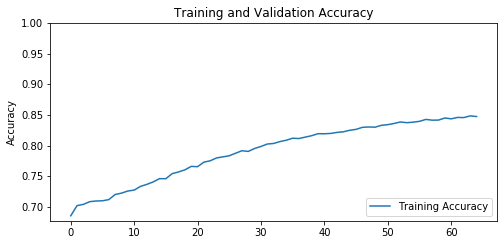

In [801]:
acc = history.history['acc']
# val_acc = history.history['val_acc']

loss = history.history['loss']
# val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.show()

In [802]:
testdata.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,BIAS
0,A20170,0.20,1,0,1,2,0,0,0,0,0,0,0.087157,0.087338,0.033380,0.151100,0.164252,0.158548,0.006794,0.003294,0.094548,0.037118,0.017872,0.010638,1
1,A16887,0.08,-1,0,1,2,0,0,0,0,0,0,0.039100,0.039345,0.023887,0.045729,0.045393,0.045140,0.001861,0.000987,0.001879,0.003221,0.004785,0.003783,1
2,A3430,0.16,1,0,0,1,-1,-1,2,0,0,-1,0.001209,0.004212,0.002337,0.005484,0.004464,0.000447,0.003434,0.000000,0.001116,0.000000,0.002392,0.032803,1
3,A3696,0.60,1,2,1,2,1,-1,-1,-2,-2,-2,0.000000,0.002541,0.001502,0.000000,0.000000,0.000000,0.002862,0.001484,0.000000,0.000000,0.000000,0.000000,1
4,A20474,0.04,-1,1,0,1,0,0,-2,-2,-2,-2,0.038266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
